# **Exploratory Data Analysis Project: Ultra-marathon Running**

This project aims to perform data cleaning techniques to the original dataset by filtering data, changing data types, renaming columns, reordering columns, removing null values, etc. Then it will perform Exploratory Data Analysis (EDA) on the dataset by utilizing plots and graphs, GroupBy... to extract some key characteristics and patterns.

## About the Dataset

The dataset contains more than **7M race records registered** between 1798 and 2022. More specifically, it contains **7,461,226 ultra-marathon race records from 1,641,168 unique athletes** in CSV format. The dataset can be found on Kaggle from the following link: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data

| Column |Description| Data type |
|---|----|---|
|Year of event| The year the race took place| int64 |
|Event dates| Date of the race |object|
| Event name | Name of the race including country location | object |
|Event distance/length| Type of the race | object|
|Event number of finishers| Number of athletes who finished the race | int64|
|Athlete performance| Time it took an athlete to finish the race | object| 
|Athlete club| City where an athlete came from | object|
|Athlete country| Country where an athlete came from | object|
|Athlete year of birth| Birth year of an athlete | float64|
|Athlete gender| Gender of an athlete | object|
|Athlete age category| Which age group an athlete belonged to in a race | object|
|Athlete average speed| The average speed of an athlete throughout the race | object|
|Athlete ID| ID of an athlete | int64|


## Import libraries: Pandas, Seaborn

In [1]:
import pandas as pd
import seaborn as sns

## Import Data Sets

In [33]:
# Suppress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [27]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [28]:
df.shape

(7461195, 13)

In [29]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


## **Data Cleaning**

In [8]:
# Filtering data to only get 50km or 50 miles USA races in 2020

In [31]:
df['Event distance/length'].value_counts()

Event distance/length
50km              1522609
100km              951742
50mi               352181
56km               333253
87km               212062
                   ...   
61.15km                 1
27:30h                  1
178km/2Etappen          1
740km                   1
158.5mi                 1
Name: count, Length: 2159, dtype: int64

In [32]:
condition_1 = df['Year of event'] == 2020
condition_2 = df['Event distance/length'].isin(['50km', '50mi'])
condition_3 = df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA'
conditions = condition_1 & condition_2 & condition_3

df2 = df[conditions]
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [34]:
# Remove '(USA)' in Event name

df2['Event name'] = df2['Event name'].str.split('(').str.get(0).str.strip()
df2[['Event name']].tail()

,Event name
2760957,Yankee Springs Fall Trail Run Festival
2760958,Yankee Springs Fall Trail Run Festival
2760959,Yankee Springs Fall Trail Run Festival
2760960,Yankee Springs Fall Trail Run Festival
2760961,Yankee Springs Fall Trail Run Festival


In [35]:
# Calculate athlete's age

df2['Athlete age'] = 2020 - df2['Athlete year of birth']
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [36]:
# Remove 'h' from Athlete performance

df2['Athlete performance'] = df2['Athlete performance'].str.replace(' h', '')
df2[['Athlete performance']].head()

,Athlete performance
2539945,3:17:55
2539946,4:02:32
2539947,4:07:57
2539948,4:22:02
2539949,4:27:34


In [39]:
# Drop some columns: Athlete club, Athlete country, Athlete year of birth, Athlete age category

df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [40]:
# Cleaning up null values

In [41]:
df2.isnull().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete age                  233
dtype: int64

In [42]:
df2 = df2.dropna()
df2.shape

(25857, 10)

In [43]:
# Check for duplicates

df2[df2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age


In [44]:
# Reset index

df2 = df2.reset_index(drop=True)
df2.tail()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0
25856,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:59:53,M,6.252,770097,40.0


In [45]:
# Fixing data types

df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)
df2['Athlete age'] = df2['Athlete age'].astype(int)

df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Athlete age                    int32
dtype: object

In [46]:
# Renaming columns

df2 = df2.rename(columns={
    'Year of event': 'year',
    'Event dates': 'race_day',
    'Event name': 'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id',
    'Athlete age': 'athlete_age'
})

df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [47]:
# Reordering columns & removing year column

df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_id', 'athlete_gender', 'athlete_age', 'athlete_performance', 'athlete_average_speed']]
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212


## **Exploratory Data Analysis**

<Axes: xlabel='race_length', ylabel='Count'>

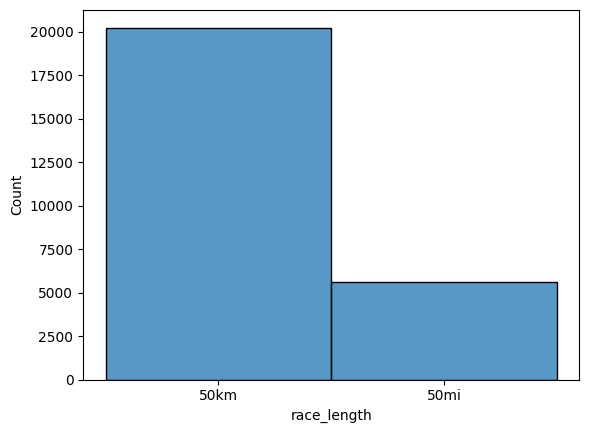

In [48]:
# 50km and 50 miles races histogram

sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

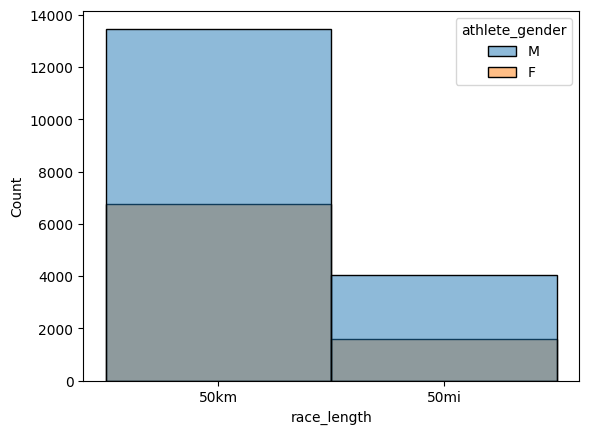

In [49]:
# 50km and 50 miles races histogram by gender

sns.histplot(data=df3, x='race_length', hue='athlete_gender')

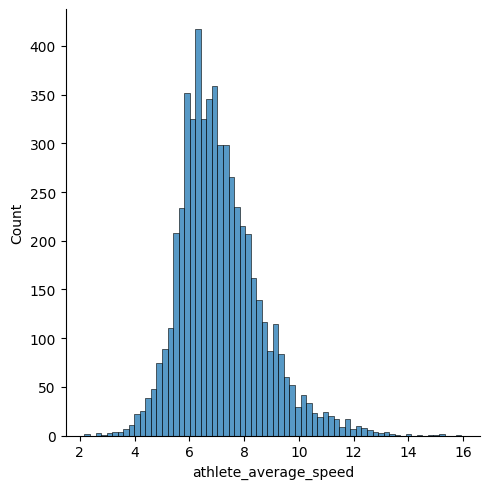

In [51]:
# Athlete average speed in 50 miles races distribution plot

sns.displot(df3[df3['race_length'] == '50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

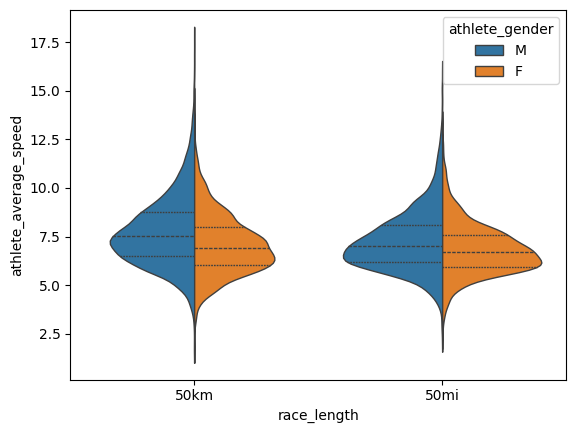

In [53]:
# Male and female athletes' average speed in 50km and 50 miles races violinplot

sns.violinplot(data=df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split=True, inner='quart', linewidth=1)

In [57]:
# Compare male and female's speed in 50km and 50 miles races

df3_groupby = df3.groupby(['race_length', 'athlete_gender'], as_index=False).agg({'athlete_average_speed': 'mean'})
df3_groupby.sort_values('athlete_gender').reset_index(drop=True)

,race_length,athlete_gender,athlete_average_speed
0,50km,F,7.083011
1,50mi,F,6.834371
2,50km,M,7.738985
3,50mi,M,7.257633


In [61]:
# Which ages are the best in terms of average speed in the 50 miles race (must have minimum 20 races)

df3_condition = df3[df3['race_length'] == '50mi']
df3_condition_groupby = df3_condition.groupby(['athlete_age'])['athlete_average_speed'].agg(['mean', 'count'])

df3_condition_groupby.query('count>=20').sort_values('mean', ascending=False).head(10)

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [62]:
# Which ages are the best in terms of average speed in the 50 miles race (must have minimum 10 races)

df3_condition_groupby.query('count>=10').sort_values('mean', ascending=True).head(10)

,mean,count
athlete_age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31


In [63]:
# Compare average speed between seasons:

#Spring: March - May
#Summer: June - August
#Fall: September - November
#Winter: December - February

In [70]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)
df3[['race_month']].tail()

,race_month
25852,10
25853,10
25854,10
25855,10
25856,10


In [82]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x>11 else 'Fall' if x>8 else 'Summer' if x>5 else 'Spring' if x>2 else 'Winter')
df3[['race_season']].head()

,race_season
0,Winter
1,Winter
2,Winter
3,Winter
4,Winter


In [84]:
df3.groupby(['race_season'])['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


In [90]:
## 50 miles runs

df3[df3['race_length'] == '50mi'].groupby(['race_season'])['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817
